In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
file_path = 'project_data.csv'  
data = pd.read_csv(file_path)

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1731 non-null   object 
 1   Population            1731 non-null   object 
 2   Latitude              1731 non-null   float64
 3   Longitude             1731 non-null   float64
 4   Year_start            1731 non-null   int64  
 5   Year_end              1731 non-null   int64  
 6   Temperature           1731 non-null   int64  
 7   Vial                  1731 non-null   int64  
 8   Replicate             1731 non-null   int64  
 9   Sex                   1731 non-null   object 
 10  Wing_area             1730 non-null   float64
 11  Wing_shape            1712 non-null   float64
 12  Wing_vein             1725 non-null   float64
 13  Asymmetry_wing_area   1705 non-null   float64
 14  Asymmetry_wing_shape  1705 non-null   float64
 15  Asymmetry_wing_vein  

In [4]:
print(data.describe())

          Latitude    Longitude  Year_start  Year_end  Temperature  \
count  1731.000000  1731.000000      1731.0    1731.0  1731.000000   
mean    -24.794910   150.821693      1994.0    1994.0    24.982669   
std       1.958099     1.220711         0.0       0.0     4.076542   
min     -27.680000   148.850000      1994.0    1994.0    20.000000   
25%     -25.520000   150.170000      1994.0    1994.0    20.000000   
50%     -25.200000   151.170000      1994.0    1994.0    25.000000   
75%     -23.770000   151.450000      1994.0    1994.0    30.000000   
max     -21.770000   152.450000      1994.0    1994.0    30.000000   

              Vial    Replicate    Wing_area   Wing_shape    Wing_vein  \
count  1731.000000  1731.000000  1730.000000  1712.000000  1725.000000   
mean      5.517042     1.968226     0.939165     2.232002     2.492117   
std       2.861570     0.812920     0.144173     0.058874     0.118903   
min       1.000000     1.000000     0.000000     2.032000     2.119000   

In [5]:
df = data.drop(columns=['Year_start', 'Year_end','Vial','Replicate'])

In [6]:
df

,Species,Population,Latitude,Longitude,Temperature,Sex,Wing_area,Wing_shape,Wing_vein,Asymmetry_wing_area,Asymmetry_wing_shape,Asymmetry_wing_vein
0,D.aldrichi,Binjour,-25.52,151.45,20,female,1.223,2.296,2.597,0.043,0.010,0.028
1,D.aldrichi,Binjour,-25.52,151.45,20,male,1.006,2.289,2.528,0.006,0.018,0.044
2,D.aldrichi,Binjour,-25.52,151.45,20,female,1.149,2.340,2.580,0.039,0.053,0.140
3,D.aldrichi,Binjour,-25.52,151.45,20,male,1.000,2.180,2.508,0.016,0.007,0.074
4,D.aldrichi,Binjour,-25.52,151.45,20,female,1.160,2.275,2.589,0.003,0.005,0.100
...,...,...,...,...,...,...,...,...,...,...,...,...
1726,D.buzzatii,Wahruna,-25.20,151.17,30,male,0.719,2.346,2.479,0.015,0.058,0.021
1727,D.buzzatii,Wahruna,-25.20,151.17,30,female,0.866,2.305,2.584,0.011,0.055,0.099
1728,D.buzzatii,Wahruna,-25.20,151.17,30,male,0.741,2.197,2.607,0.009,0.011,0.134
1729,D.buzzatii,Wahruna,-25.20,151.17,30,female,0.840,2.254,2.582,0.015,0.065,0.008


# 1. preprocessing

## 1.1 missing data

In [7]:
df_impu_class = df.copy()

In [8]:
cat_list = df_impu_class.iloc[:,1].unique()

In [9]:
cat_list

array(['Binjour', 'Gogango_Creek', 'Grandchester', 'Oxford_Downs',
       'Wahruna'], dtype=object)

In [10]:
numerical_cols = ['Wing_area', 'Wing_shape', 'Wing_vein', 'Asymmetry_wing_area', 'Asymmetry_wing_shape', 'Asymmetry_wing_vein']

for feature in numerical_cols:
    df_impu_class[feature] = df_impu_class.groupby(['Species', 'Population','Sex'])[feature].transform(lambda x: x.fillna(x.mean()))

In [11]:
df_impu_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1731 non-null   object 
 1   Population            1731 non-null   object 
 2   Latitude              1731 non-null   float64
 3   Longitude             1731 non-null   float64
 4   Temperature           1731 non-null   int64  
 5   Sex                   1731 non-null   object 
 6   Wing_area             1731 non-null   float64
 7   Wing_shape            1731 non-null   float64
 8   Wing_vein             1731 non-null   float64
 9   Asymmetry_wing_area   1731 non-null   float64
 10  Asymmetry_wing_shape  1731 non-null   float64
 11  Asymmetry_wing_vein   1731 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 162.4+ KB


## 1.2 Normalization

### Normalization can be only applied to valid numerical features.

In [12]:
from sklearn.preprocessing import MinMaxScaler

df_nor = df_impu_class.copy()

numerical_cols = ['Wing_area', 'Wing_shape', 'Wing_vein', 'Asymmetry_wing_area', 'Asymmetry_wing_shape', 'Asymmetry_wing_vein']

scaler_minmax = MinMaxScaler()
df_nor[numerical_cols] = scaler_minmax.fit_transform(df_nor[numerical_cols])

In [13]:
df_nor

,Species,Population,Latitude,Longitude,Temperature,Sex,Wing_area,Wing_shape,Wing_vein,Asymmetry_wing_area,Asymmetry_wing_shape,Asymmetry_wing_vein
0,D.aldrichi,Binjour,-25.52,151.45,20,female,0.940046,0.680412,0.566351,0.380531,0.045662,0.065882
1,D.aldrichi,Binjour,-25.52,151.45,20,male,0.773251,0.662371,0.484597,0.053097,0.082192,0.103529
2,D.aldrichi,Binjour,-25.52,151.45,20,female,0.883167,0.793814,0.546209,0.345133,0.242009,0.329412
3,D.aldrichi,Binjour,-25.52,151.45,20,male,0.768640,0.381443,0.460900,0.141593,0.031963,0.174118
4,D.aldrichi,Binjour,-25.52,151.45,20,female,0.891622,0.626289,0.556872,0.026549,0.022831,0.235294
...,...,...,...,...,...,...,...,...,...,...,...,...
1726,D.buzzatii,Wahruna,-25.20,151.17,30,male,0.552652,0.809278,0.426540,0.132743,0.264840,0.049412
1727,D.buzzatii,Wahruna,-25.20,151.17,30,female,0.665642,0.703608,0.550948,0.097345,0.251142,0.232941
1728,D.buzzatii,Wahruna,-25.20,151.17,30,male,0.569562,0.425258,0.578199,0.079646,0.050228,0.315294
1729,D.buzzatii,Wahruna,-25.20,151.17,30,female,0.645657,0.572165,0.548578,0.132743,0.296804,0.018824


## 1.2 Encode data

In [14]:
from sklearn.preprocessing import LabelEncoder

df_encode = df_nor.copy()
label_encoder = LabelEncoder()
# Encode the Species column
df_encode['Species'] = label_encoder.fit_transform(df_encode['Species'])
# Encode the Sex column
df_encode['Sex'] = label_encoder.fit_transform(df_encode['Sex'])
# Encode the Population column
df_encode['Population'] = label_encoder.fit_transform(df_encode['Population'])

In [15]:
df_encode

,Species,Population,Latitude,Longitude,Temperature,Sex,Wing_area,Wing_shape,Wing_vein,Asymmetry_wing_area,Asymmetry_wing_shape,Asymmetry_wing_vein
0,0,0,-25.52,151.45,20,0,0.940046,0.680412,0.566351,0.380531,0.045662,0.065882
1,0,0,-25.52,151.45,20,1,0.773251,0.662371,0.484597,0.053097,0.082192,0.103529
2,0,0,-25.52,151.45,20,0,0.883167,0.793814,0.546209,0.345133,0.242009,0.329412
3,0,0,-25.52,151.45,20,1,0.768640,0.381443,0.460900,0.141593,0.031963,0.174118
4,0,0,-25.52,151.45,20,0,0.891622,0.626289,0.556872,0.026549,0.022831,0.235294
...,...,...,...,...,...,...,...,...,...,...,...,...
1726,1,4,-25.20,151.17,30,1,0.552652,0.809278,0.426540,0.132743,0.264840,0.049412
1727,1,4,-25.20,151.17,30,0,0.665642,0.703608,0.550948,0.097345,0.251142,0.232941
1728,1,4,-25.20,151.17,30,1,0.569562,0.425258,0.578199,0.079646,0.050228,0.315294
1729,1,4,-25.20,151.17,30,0,0.645657,0.572165,0.548578,0.132743,0.296804,0.018824


# 2. Exploratory Data Analysis (EDA)

In [16]:
df_map = df_encode.copy()

## 2.1 Histogram

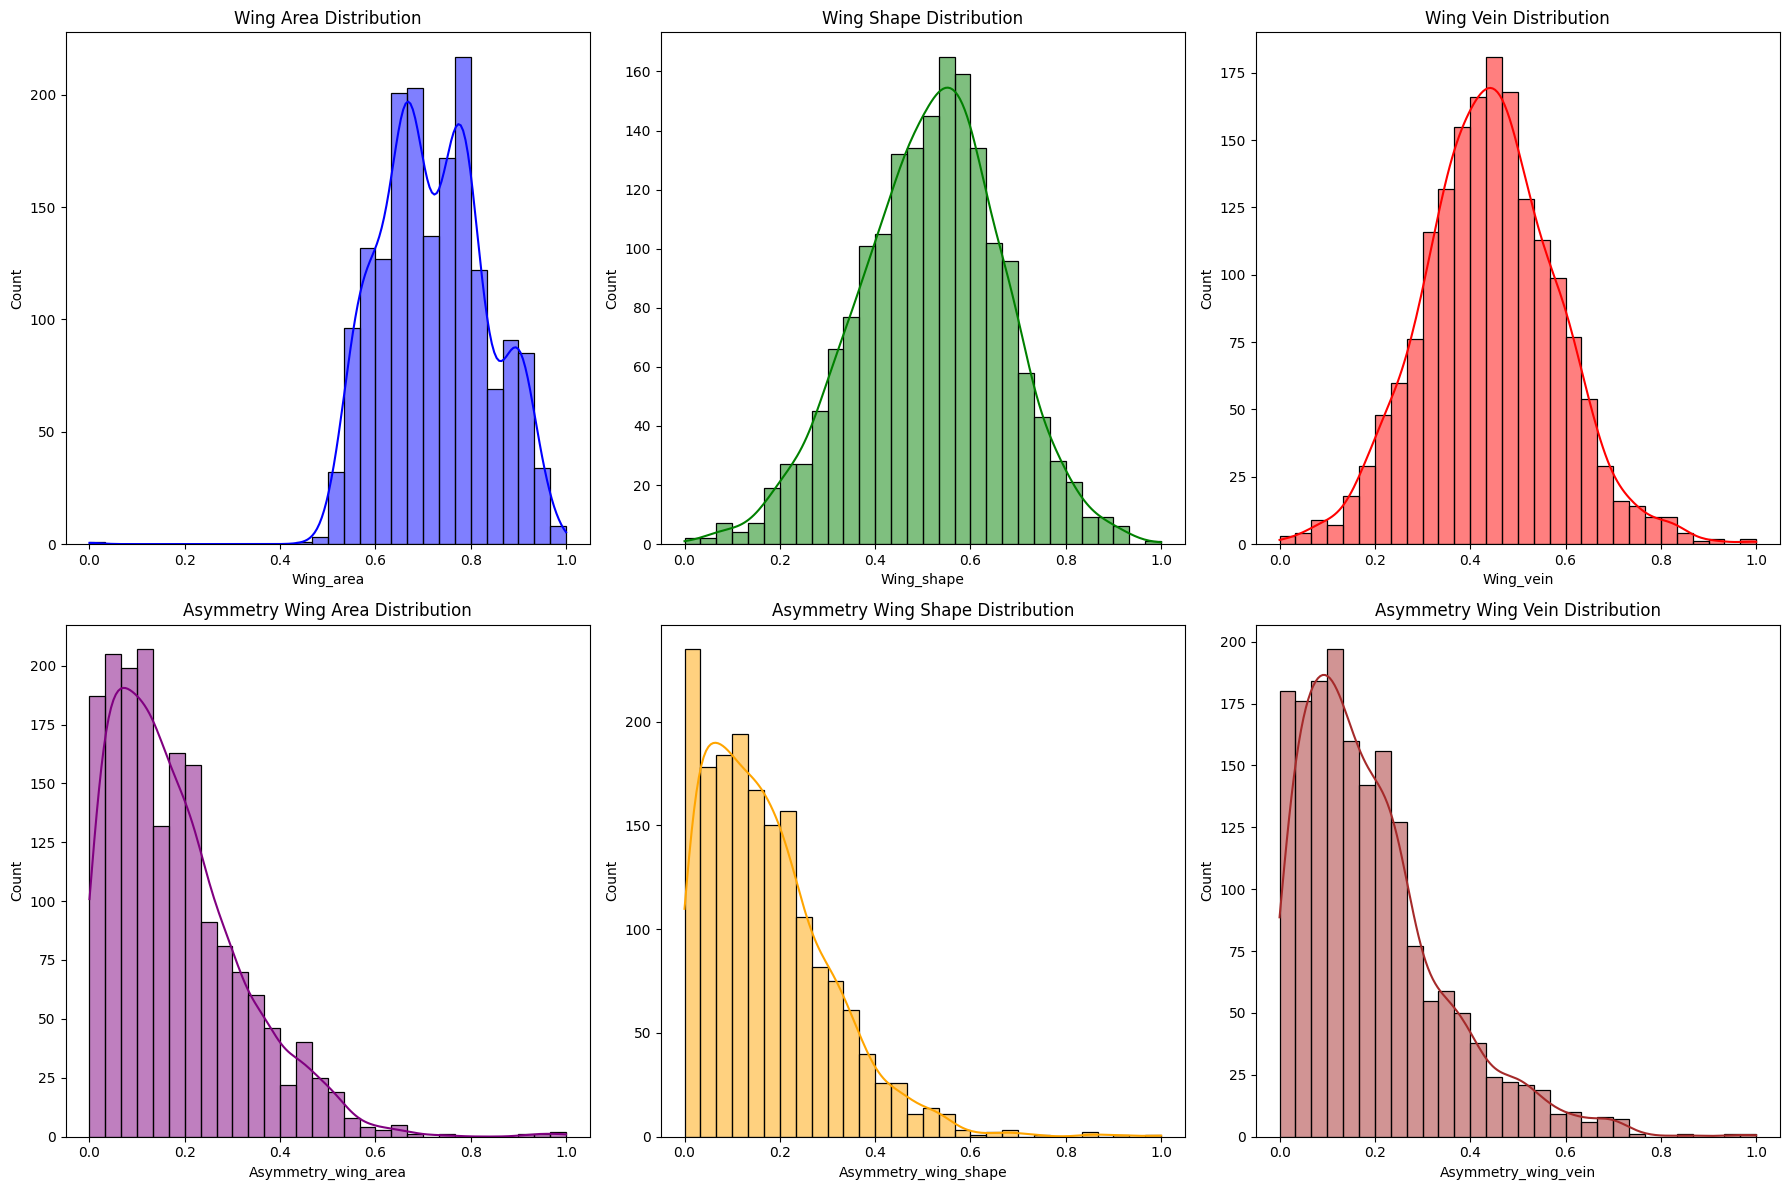

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the graph and create subgraphs in a 2x3 grid layout
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Sub-figure 1: Wing Area distribution
sns.histplot(df_map['Wing_area'], bins=30, kde=True, ax=axs[0, 0], color ='blue')
axs[0, 0].set_title('Wing Area Distribution')

# Sub-figure 2: Wing Shape distribution
sns.histplot(df_map['Wing_shape'], bins=30, kde=True, ax=axs[0, 1], color ='green')
axs[0, 1].set_title('Wing Shape Distribution')

# Sub-figure 3: Wing Vein distribution
sns.histplot(df_map['Wing_vein'], bins=30, kde=True, ax=axs[0, 2],color ='red')
axs[0, 2].set_title('Wing Vein Distribution')

# Sub-figure 4: Wing area asymmetry distribution
sns.histplot(df_map['Asymmetry_wing_area'], bins=30, kde=True, ax=axs[1, 0],color ='purple')
axs[1, 0].set_title('Asymmetry Wing Area Distribution')

# Sub-figure 4: Wing Shape asymmetry distribution
sns.histplot(df_map['Asymmetry_wing_shape'], bins=30, kde=True, ax=axs[1, 1],color ='orange')
axs[1, 1].set_title('Asymmetry Wing Shape Distribution')

# Sub-figure 4: Wing Vein asymmetry distribution
sns.histplot(df_map['Asymmetry_wing_vein'], bins=30, kde=True, ax=axs[1, 2],color ='brown')
axs[1, 2].set_title('Asymmetry Wing Vein Distribution')

plt.tight_layout()
plt.show()


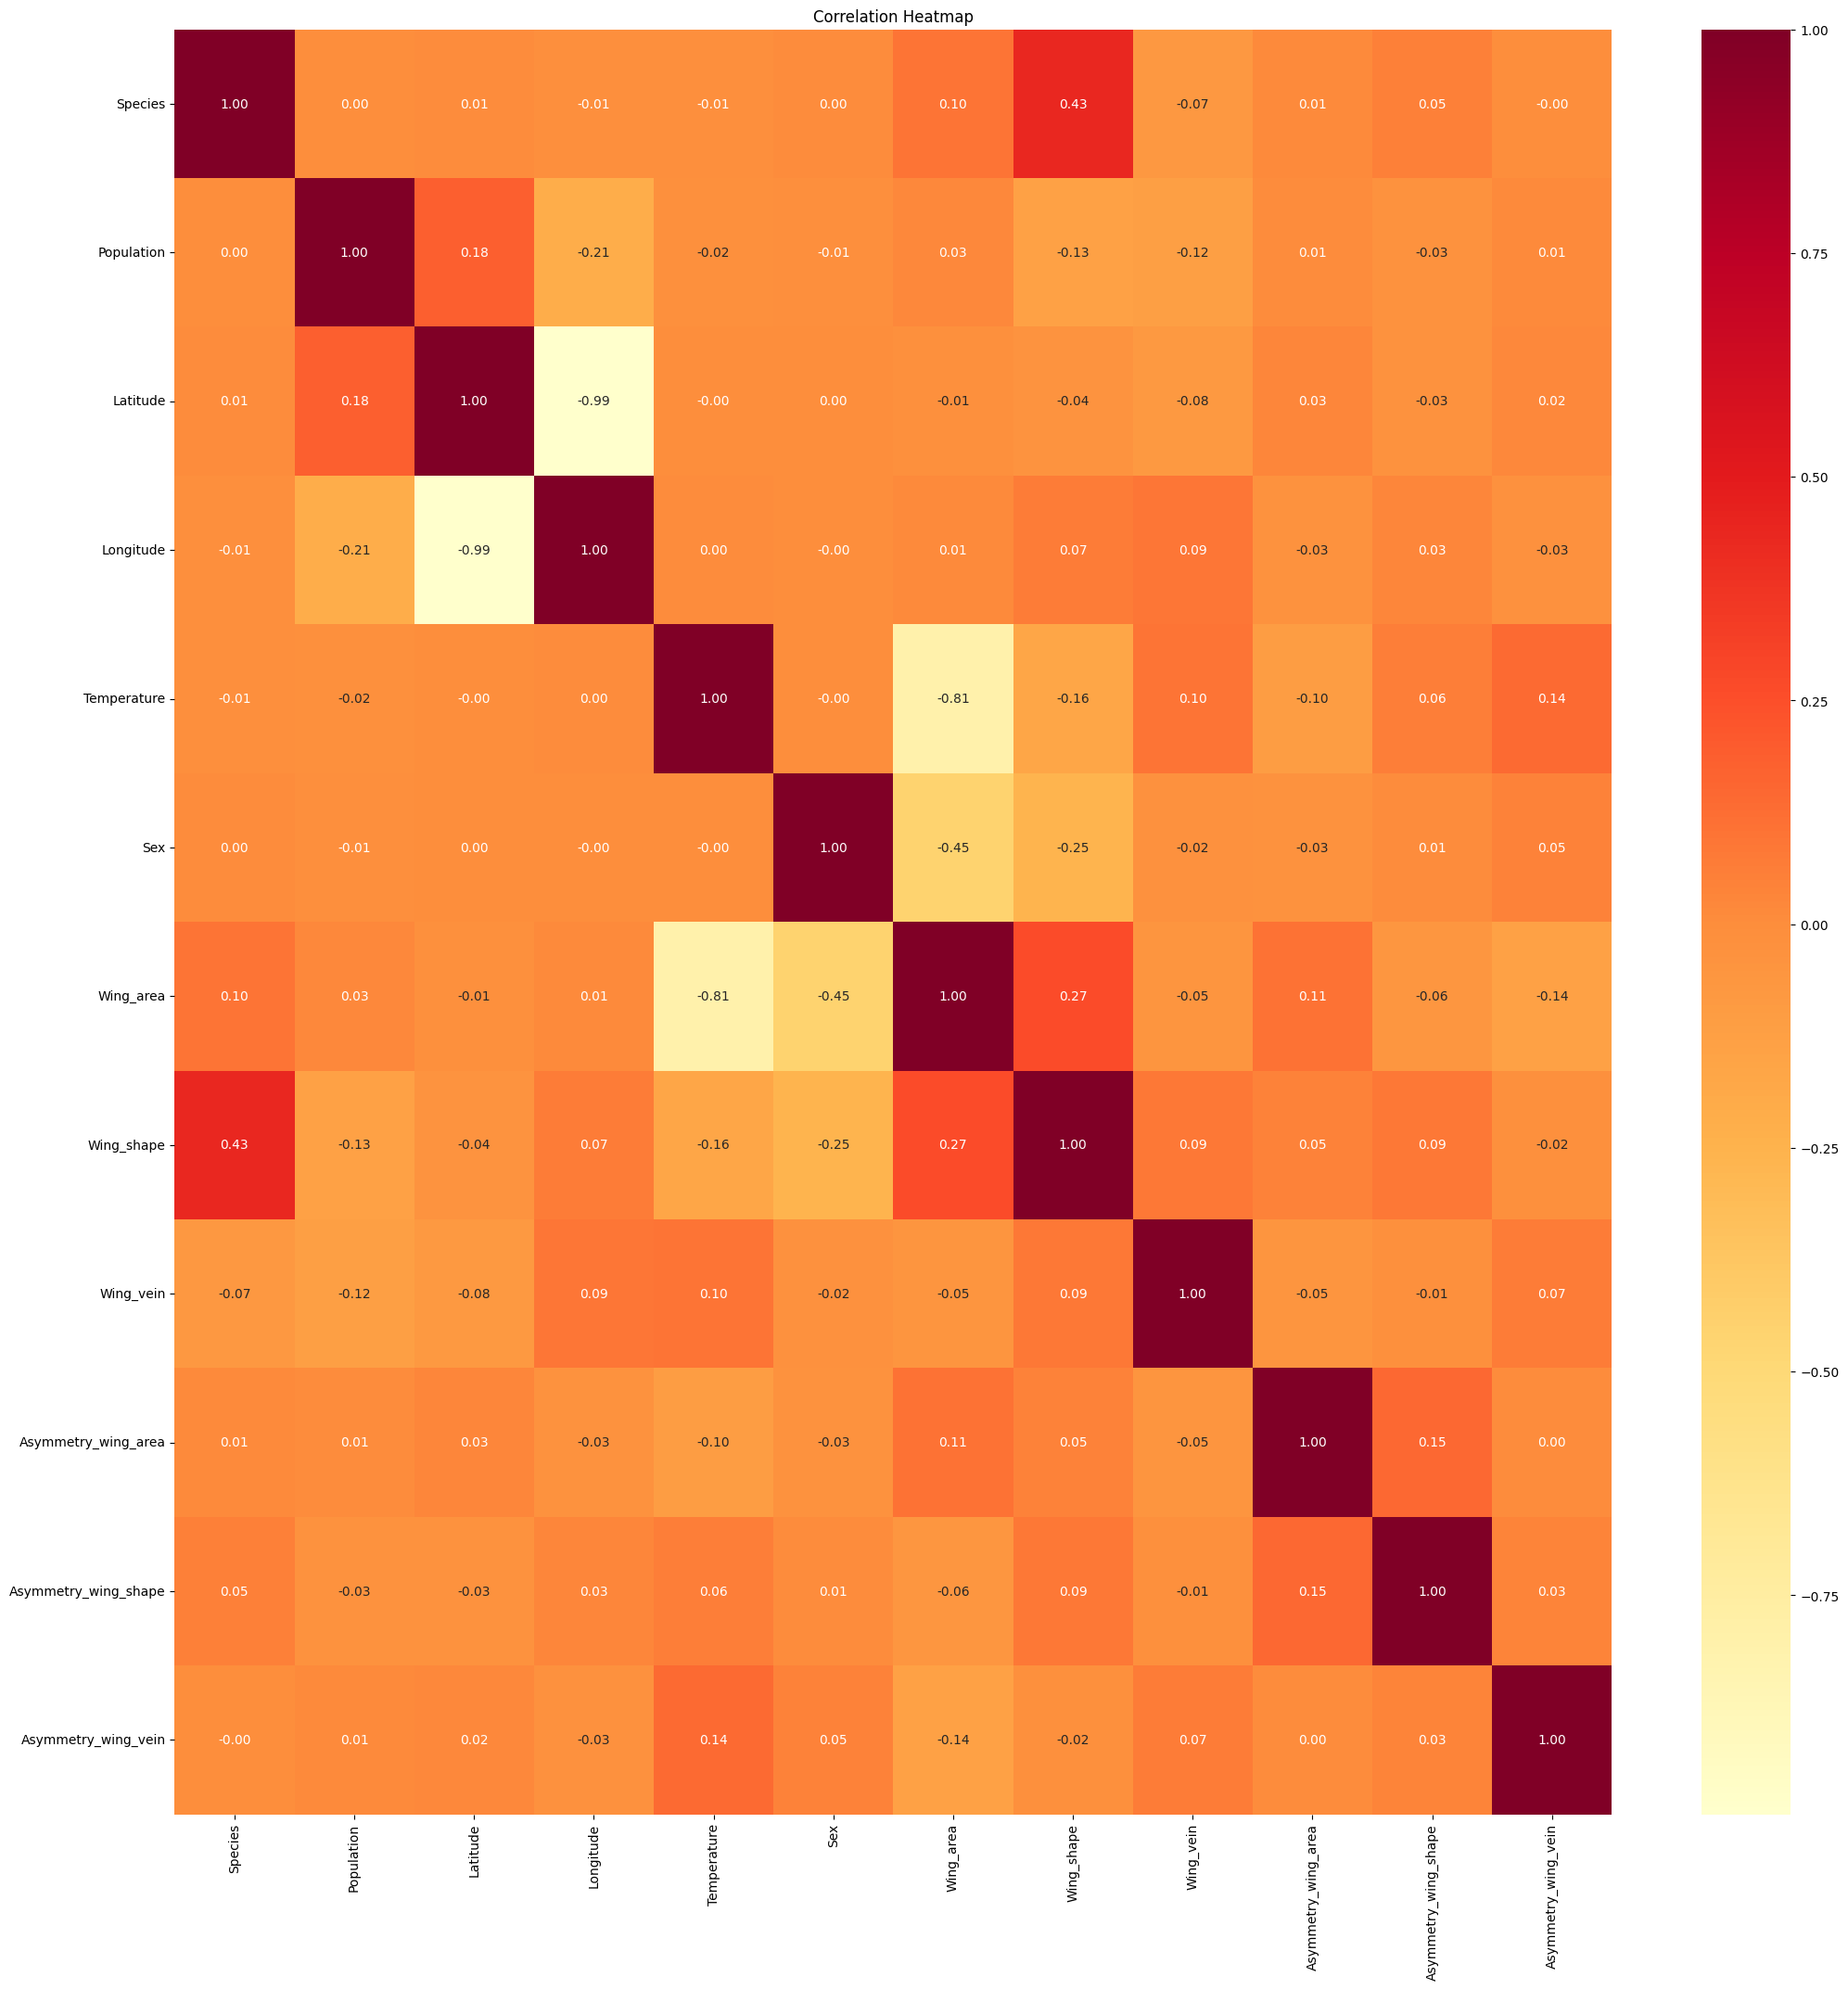

In [18]:
plt.figure(figsize=(25, 25))
sns.heatmap(df_map.corr(), annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:
df_map.to_csv('output.csv', index=False)

# 3. Building model

In [20]:
data_model = df_encode.copy()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

The data set contains multiple features, such as geographical location (Latitude, Longitude), temperature (Temperature), labels for different species and populations (Species and Population labels), gender labels (Sex_female, Sex_male), and multiple features related to wings . We will use these features to predict Species.

We will build three machine learning models to predict Species, and evaluate and compare their accuracy:

Logistic Regression
Random Forest
K-Nearest Neighbors (KNN)

In [56]:
random_seed = 42
np.random.seed(random_seed)

# Separate features and target variables
X = data_model.drop('Species', axis=1)
y = data_model['Species']

# Split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed,stratify=y)

## 3.1 LogisticRegression

In [23]:
# Train a logistic regression model
log_reg = LogisticRegression(max_iter=10000,random_state=random_seed)
log_reg.fit(X_train, y_train)

# Predict and evaluate models
y_pred_log = log_reg.predict(X_test)

# Calculate the confusion matrix
accuracy_logi = accuracy_score(y_test, y_pred_log)
best_report = classification_report(y_test, y_pred_log)

print('----------------------------')
print(f"Basic Logistic Accuracy: {np.around(accuracy_logi*100, 2)}%")
print('Classification Report:\n', classification_report(y_test, y_pred_log))
default_logi_params = log_reg.get_params()
default_C = default_logi_params['C']
default_penalty = default_logi_params['penalty']
default_solver = default_logi_params['solver']
print(f"Default Parameters: C: {default_C} , penalty: {default_penalty} , solver: {default_solver}")

----------------------------
Basic Logistic Accuracy: 74.42%
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       252
           1       0.74      0.77      0.76       268

    accuracy                           0.74       520
   macro avg       0.74      0.74      0.74       520
weighted avg       0.74      0.74      0.74       520

Default Parameters: C: 1.0 , penalty: l2 , solver: lbfgs


### 3.1.1 LogisticRegression Tuning Hyperparameter

Hyperparameter tuning: We use cross-validation and grid search (GridSearchCV) to tune model hyperparameters, such as regularization strength C and regularization type penalty

In [81]:
param_grid = [
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
]


# Use grid search for parameter adjustment
log_reg_tune = LogisticRegression(max_iter=10000,random_state=random_seed)
log_grid_search = GridSearchCV(estimator=log_reg_tune, param_grid=param_grid, cv=cv, scoring='accuracy')
log_grid_search.fit(X_train, y_train)

# Output the best parameters
best_logi_params = log_grid_search.best_params_

# Use the best parameters for prediction
best_log_reg = log_grid_search.best_estimator_
y_pred_best_log_reg = best_log_reg.predict(X_test)

accuracy_logi_tune = accuracy_score(y_test, y_pred_best_log_reg)
best_logi_report = classification_report(y_test, y_pred_best_log_reg)

print('----------------------------')
print(f"Best Logistic Accuracy: {np.around(accuracy_logi_tune*100, 2)}%")
print('Classification Report:\n', best_logi_report)
print('Best parameters:', best_logi_params)

----------------------------
Best Logistic Accuracy: 76.54%
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       252
           1       0.77      0.78      0.77       268

    accuracy                           0.77       520
   macro avg       0.77      0.76      0.76       520
weighted avg       0.77      0.77      0.77       520

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


### 3.2 RandomForestClassifier

In [25]:
# Train random forest modelstratify=y
rf = RandomForestClassifier(random_state=random_seed)
rf.fit(X_train, y_train)

# Predict and evaluate models
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Basic Random Forest Accuracy: {np.around(accuracy_rf*100, 2)}%")
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

default_rf_params = rf.get_params()
default_n_est = default_rf_params['n_estimators']
default_dep = default_rf_params['max_depth']
default_sam_spl = default_rf_params['min_samples_split']
default_sam_lf = default_rf_params['min_samples_leaf']
default_fea = default_rf_params['max_features']
print(f"Default Parameters: 'n_estimators': {default_n_est}, 'max_depth': {default_dep} , 'min_samples_leaf': {default_sam_lf}，'min_samples_split': {default_sam_spl},'max_features': {default_fea} ")

Basic Random Forest Accuracy: 75.96%
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       252
           1       0.79      0.73      0.76       268

    accuracy                           0.76       520
   macro avg       0.76      0.76      0.76       520
weighted avg       0.76      0.76      0.76       520

Default Parameters: 'n_estimators': 100, 'max_depth': None , 'min_samples_leaf': 1，'min_samples_split': 2,'max_features': sqrt 


### 3.2.1 RandomForestClassifier Tuning Hyperparameter

In [92]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None,10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_seed)

# Use grid search for parameter adjustment
rf_tune = RandomForestClassifier(random_state=random_seed)
rf_search = GridSearchCV(estimator=rf_tune, param_grid=param_grid, cv=cv)
rf_search.fit(X_train, y_train)

# Output the best parameters
best_rf_params = rf_search.best_params_

# Use the best parameters for prediction
best_rf = rf_search.best_estimator_
y_pred_best_rf= best_rf.predict(X_test)
    
accuracy_rf_tune = accuracy_score(y_test, y_pred_best_rf)
best_rf_report = classification_report(y_test, y_pred_best_rf)

print('----------------------------')
print(f"Best RandomForest Accuracy: {np.around(accuracy_rf_tune*100, 2)}%")
print('Classification Report:\n', best_rf_report)
print('Best parameters:', best_rf_params)

----------------------------
Best RandomForest Accuracy: 75.96%
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       252
           1       0.79      0.73      0.76       268

    accuracy                           0.76       520
   macro avg       0.76      0.76      0.76       520
weighted avg       0.76      0.76      0.76       520

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### 3.1 KNeighborsClassifier

In [57]:
random_seed = 42
np.random.seed(random_seed)

# Separate features and target variables
X = data_model.drop('Species', axis=1)
y = data_model['Species']

# Split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed,stratify=y)

In [58]:
# Train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict and evaluate models
y_pred_knn = knn.predict(X_test)
best_knn_params = knn.get_params()
accuracy_KNN = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {np.around(accuracy_KNN*100, 2)}%")
print('Classification Report:\n', classification_report(y_test, y_pred_knn))
print('Best parameters:', best_knn_params)

KNN Accuracy: 72.69%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       252
           1       0.72      0.78      0.75       268

    accuracy                           0.73       520
   macro avg       0.73      0.73      0.73       520
weighted avg       0.73      0.73      0.73       520

Best parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [88]:
param_grid = {
    'n_neighbors': range(1, 100),
}

# Train KNN model
knn_new = KNeighborsClassifier()

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_seed)

# Use grid search for parameter adjustment
knn_grid_search = GridSearchCV(knn_new, param_grid, cv=cv, scoring='accuracy', return_train_score=True)
knn_grid_search.fit(X_train, y_train)

# Output the best parameters
knn_best_params = knn_grid_search.best_params_

# Predict and evaluate models
knn_best = KNeighborsClassifier(**knn_best_params)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print(f"KNN Accuracy: {np.around(accuracy_best*100, 2)}%")
print('Classification Report:\n', report_best)
print('Best parameters:', knn_best_params)

KNN Accuracy: 72.69%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       252
           1       0.72      0.78      0.75       268

    accuracy                           0.73       520
   macro avg       0.73      0.73      0.73       520
weighted avg       0.73      0.73      0.73       520

Best parameters: {'n_neighbors': 5}


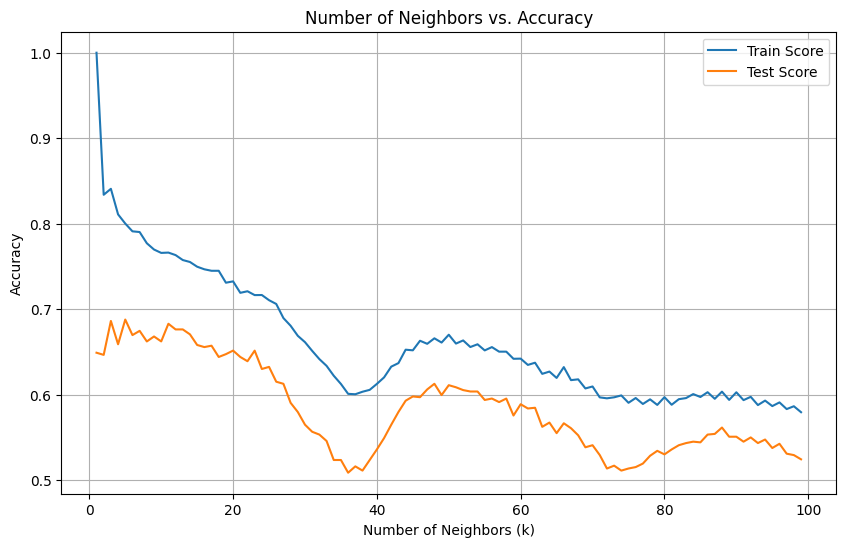

In [90]:
# 可视化n_neighbors和精确度

results = knn_grid_search.cv_results_
mean_test_scores = results['mean_test_score']
mean_train_scores = results['mean_train_score']
param_range = results['param_n_neighbors']

plt.figure(figsize=(10, 6))
plt.plot(param_range, mean_train_scores, label='Train Score')
plt.plot(param_range, mean_test_scores, label='Test Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Number of Neighbors vs. Accuracy')
plt.legend()
plt.grid()
plt.show()

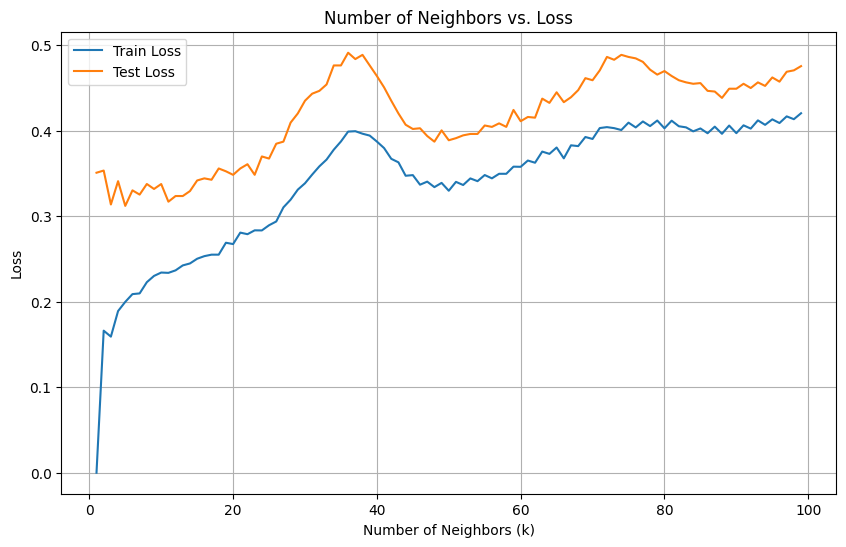

In [91]:
# 可视化损失图像
plt.figure(figsize=(10, 6))
plt.plot(param_range, 1 - mean_train_scores, label='Train Loss')
plt.plot(param_range, 1 - mean_test_scores, label='Test Loss')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Loss')
plt.title('Number of Neighbors vs. Loss')
plt.legend()
plt.grid()
plt.show()